In [1]:
# Import numpy with alias np and pandas alias pd
import numpy as np
import pandas as pd

In [2]:
# Load dataset
food_consumption = pd.read_csv('food_consumption.csv')

In [3]:
# Print head of dataset
food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [4]:
# Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.

# Filter for Belgium
be_consumption = pd.DataFrame(food_consumption[food_consumption['country']=='Belgium'])

# Filter for USA
usa_consumption = pd.DataFrame(food_consumption[food_consumption['country']=='USA'])

In [5]:
# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption))
print(np.median(be_consumption['consumption']))

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
12.59


In [6]:
# Calculate mean and median consumption in USA
print(np.mean(usa_consumption))
print(np.median(usa_consumption['consumption']))

Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
14.58


In [8]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

In [9]:
# Group the subsetted data by country and select only the consumption column. Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg()

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


In [10]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

In [11]:
# Subset food_consumption to get the rows where food_category is 'rice'.
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

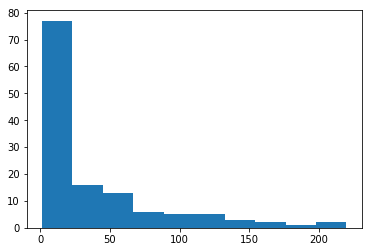

In [12]:
# Create a histogram of co2_emission for rice and show the plot.
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [14]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [15]:
# Calculate the quartiles of the co2_emission column of food_consumption.
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [16]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [17]:
# Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


In [18]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


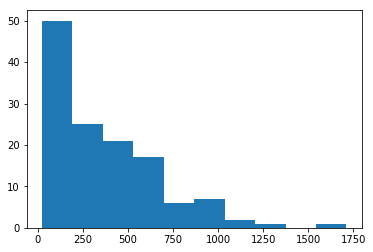

In [19]:
# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()

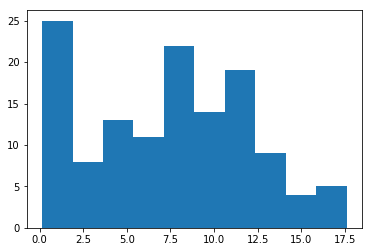

In [20]:
# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.show()

In [26]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)
print(type(emissions_by_country))

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64
<class 'pandas.core.series.Series'>


In [22]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [23]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [25]:
# Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
